In [2]:
import eeg_decoder
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [3]:
experiment_name = 'B01'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False)

In [4]:
ss1,ss3 = [11,21],[13,23]
color,ori = [11,13],[21,23]

In [5]:
time_window = 25 
time_step = 25
trial_average = 15 
n_splits = 100
group_dict = OrderedDict([('1 Color',[11]),('3 Colors',[13])])

wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [5]:
for isub in range(exp.nsub):

    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.group_labels(xdata,ydata)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):

            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

interp_color = eeg_decoder.Interpreter(clfr,subtitle='color')
interp_color.save_results()

0
1
2
3
4
5
6
7
8
9
10
11
12


Significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1000 1024 1048 1072
 1096 1120 1144 1168 1192 1216]
Saving output\figures\acccolor_load.pdf
Saving output\figures\acccolor_load.png


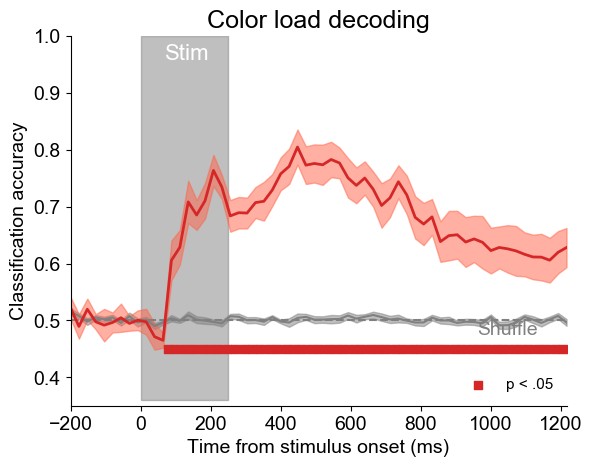

Mean delay accuracy: 0.6916823014383989
Mean delay S.D.: 0.05938315568333715


In [16]:
interp_color.plot_acc(significance_testing=True,savefig=True, ylim=[0.35,1],chance_text_y=.23, title='Color load decoding',subtitle='color_load')

# Orientation

In [7]:
group_dict = OrderedDict([('1 Orientation',[21]),('3 Orientation',[23])])
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [8]:
for isub in range(exp.nsub):

    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.group_labels(xdata,ydata)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):

            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

interp_orientation = eeg_decoder.Interpreter(clfr,subtitle='orientation')
interp_orientation.save_results()

0
1
2
3
4
5
6
7
8
9
10
11
12


Significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1000 1024 1048 1072
 1096 1120 1144 1168 1192 1216]
Saving output\figures\accori_load.pdf
Saving output\figures\accori_load.png


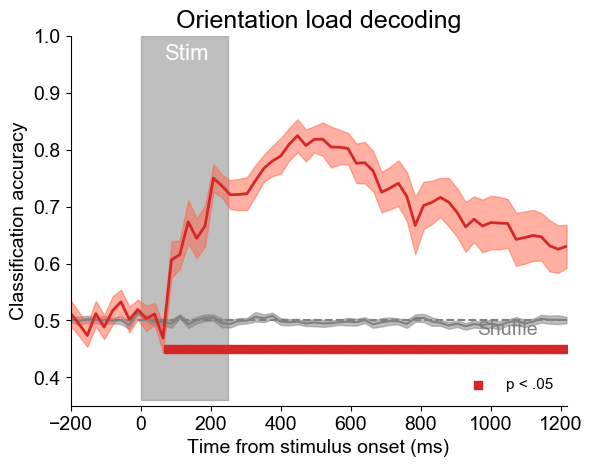

Mean delay accuracy: 0.7233896185115697
Mean delay S.D.: 0.061110760285524354


In [14]:
interp_orientation.plot_acc(significance_testing=True,savefig=True, ylim=[0.35,1],chance_text_y=.23, title='Orientation load decoding',subtitle='ori_load')

# compare

In [7]:
interp_color = eeg_decoder.Interpreter()
interp_color.load_results('color')
interp_color.acc = interp_color.acc
interp_color.acc_shuff = interp_color.acc_shuff
interp_orientation = eeg_decoder.Interpreter()
interp_orientation.load_results('orientation')

In [8]:
# Combine acc matrices for plotting
interp = eeg_decoder.Interpreter(clfr,subtitle='compare')
interp.acc = np.concatenate([interp_orientation.acc[:,np.newaxis],interp_color.acc[:,np.newaxis]],1)
interp.acc_shuff = np.concatenate([interp_orientation.acc_shuff[:,np.newaxis],interp_color.acc_shuff[:,np.newaxis]],1)

Color significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1000 1024 1048 1072
 1096 1120 1144 1168 1192 1216]
Color mean delay accuracy: 0.7233896185115697
Color mean delay S.D.: 0.061110760285524354
Orientation significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1000 1024 1048 1072
 1096 1120 1144 1168 1192 1216]
Orientation mean delay accuracy: 0.6916823014383989
Orientation mean delay S.D.: 0.05938315568333715
Saving output\figures\compareaccwithin_single_feature.pdf
Saving output\figures\compareaccwithin_single_feature.png


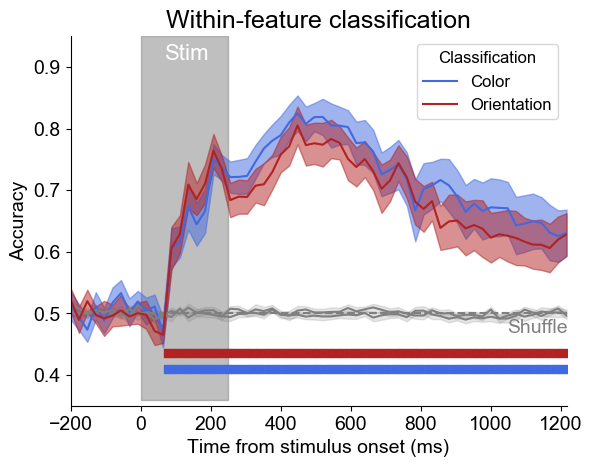

In [11]:
interp.plot_acc_subset(
    subset_list=['Color','Orientation'],
    ylim=[.35,.95], 
    chance=.5, 
    sig_ys=[.41,.435], 
    chance_text_y=.234,
    significance_testing=True,
    title='Within-feature classification',
    subtitle='within_single_feature',
    savefig=True)